In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData.csv to SalaryData.csv


In [ ]:
salary = pd.read_csv('SalaryData.csv')
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
salary.shape

(375, 6)

In [ ]:
# data cleaning
salary.duplicated().sum()

50

In [ ]:
salary.drop_duplicates(inplace = True)
salary.duplicated().sum()

0

In [ ]:
salary.shape

(325, 6)

In [ ]:
salary.isnull().sum()

,0
Age,1
Gender,1
Education Level,1
Job Title,1
Years of Experience,1
Salary,1


In [ ]:
salary.dropna(inplace = True)
salary.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
salary.shape

(324, 6)

In [ ]:
# linear regression model to predict salary when the 'years of experience' is given
feature_name = 'Years of Experience'
target_name = 'Salary'
data, target = salary[[feature_name]], salary[target_name]

Text(0, 0.5, 'Salary')

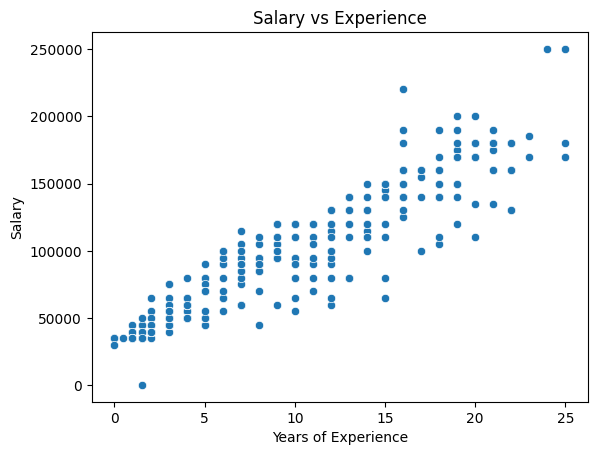

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.scatterplot( data = salary, x = data, y = target)
ax.set_title('Salary vs Experience')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
#plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( data, target, test_size = 0.25, random_state = 42)

In [ ]:
x_train

,Years of Experience
220,19.0
186,6.0
337,7.0
224,2.0
283,1.5
...,...
189,1.5
71,11.0
106,3.0
284,9.0


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)

In [ ]:
mse1 = mean_squared_error(y_train, y_train_pred)
mse2 = mean_squared_error(y_test, y_test_pred)
print("mse1:", mse1,"\nmse2:", mse2)

mse1: 373222374.34851843 
mse2: 253312013.05474797


In [ ]:
from sklearn.metrics import r2_score
R_squared = r2_score(y_train, y_train_pred)
print("R_squared =", R_squared)

R_squared = 0.8489873135690967


In [ ]:
import numpy as np

In [ ]:
x_train.columns

Index(['Years of Experience'], dtype='object')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


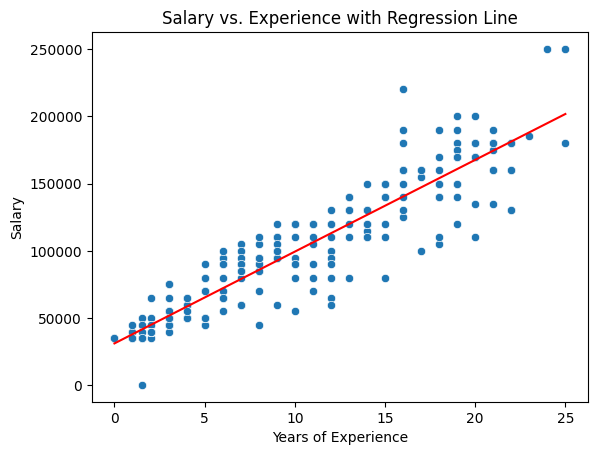

In [ ]:
ax = sns.scatterplot(x = x_train['Years of Experience'], y = y_train)
x_line = np.linspace(x_train['Years of Experience'].min(), x_train['Years of Experience'].max(), 100)
y_line = lin_reg.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color = 'red')
ax.set_title('Salary vs. Experience with Regression Line')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
plt.show()

In [ ]:
#to prevent the warning
x_line_df = pd.DataFrame(x_line, columns = ['Years of Experience'])
y_line = lin_reg.predict(x_line_df)

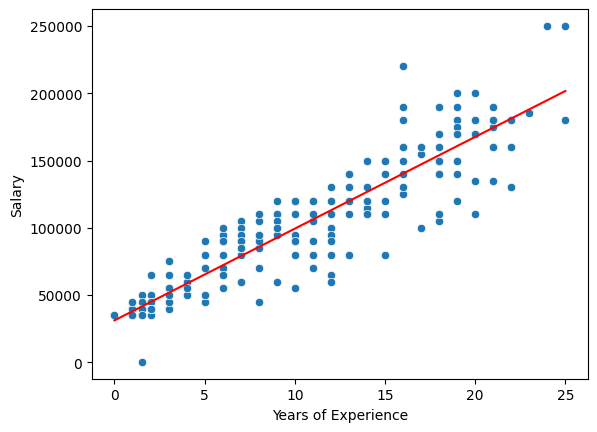

In [ ]:
#plotting the graph again
ax = sns.scatterplot(x = x_train['Years of Experience'], y = y_train)
plt.plot(x_line, y_line, color = 'red')
plt.show()